In [2]:
# Import libraries
import pandas as pd
import numpy as np
import itertools
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from matplotlib.pyplot import figure

from scipy.stats import t

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#hapus data duplicate
df.drop_duplicates(inplace=True)

In [8]:
#hapus null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#analisa deskriptif
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#variabel kategorik
df.describe(include=['O'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [11]:
#rata-rata umur
mean_umur = df["age"].mean()

print(f"Rata-rata umur pada data adalah {mean_umur:.0f} tahun")

Rata-rata umur pada data adalah 39 tahun


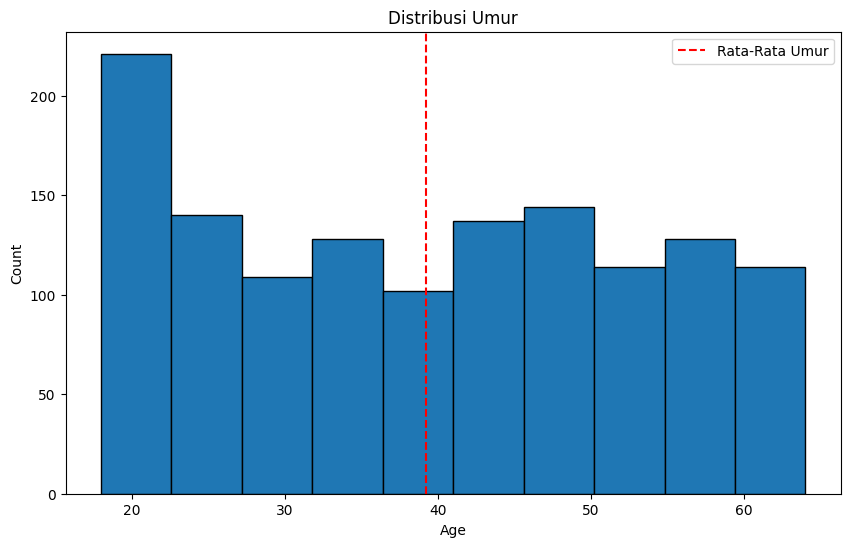

In [14]:
# Visualisasi dengan Matplotlib
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.axvline(mean_umur, color='red', linestyle='dashed', linewidth=1.5, label='Rata-Rata Umur')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribusi Umur')
plt.legend()
plt.show()

In [16]:
# rata-rata nilai BMI
mean_bmi = df['bmi'].mean()

print(f"Rata-rata nilai BMI dari data: {mean_bmi:.2f}")

Rata-rata nilai BMI dari data: 30.66


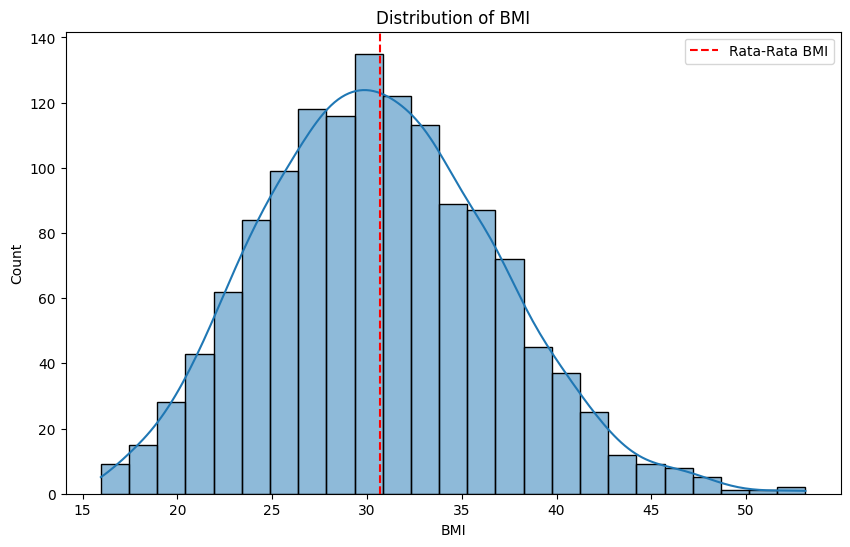

In [17]:
# Visualisasi dengan Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bmi', kde=True)
plt.axvline(mean_bmi, color='red', linestyle='dashed', linewidth=1.5, label='Rata-Rata BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.legend()
plt.show()

In [18]:
# Menghitung median dari tagihan
median_charges = df['charges'].median()

print(f"Median tagihan dari data: {median_charges:.2f}")

Median tagihan dari data: 9386.16
